Sela Rabila | 0110218109 | TI 2017 Sore


1.  Pilih satu algoritma machine learning (klasifikasi/clustering) untuk data mining
2.  lakukan proses data mining dari pre-processing, training, testing, visualisasi data
3. gunakan open dataset bersumber dari kaggle.com
4. dalam bentuk jupyter notebook (penjelasan tiap langkah dan hasil eksekusi kode)
5. ceritakan ide penerapan pada data/kasus lain



Pemrosesan Data Mining dengan Dataset Netflix Movies and TV Shows @kaggle.com

1. Proses Data Mining Preprocessing

In [10]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [11]:
#import dataset
dataset = pd.read_csv('netflix_titles.csv')

dataset.head(15)

show_id  ...                                        description
0       s1  ...  In a future where the elite inhabit an island ...
1       s2  ...  After a devastating earthquake hits Mexico Cit...
2       s3  ...  When an army recruit is found dead, his fellow...
3       s4  ...  In a postapocalyptic world, rag-doll robots hi...
4       s5  ...  A brilliant group of students become card-coun...
5       s6  ...  A genetics professor experiments with a treatm...
6       s7  ...  After an awful accident, a couple admitted to ...
7       s8  ...  After one of his high school students attacks ...
8       s9  ...  When a doctor goes missing, his psychiatrist w...
9      s10  ...  An architect and his wife move into a castle t...
10     s11  ...  A farmer pens a confession admitting to his wi...
11     s12  ...  In this dark alt-history thriller, a naïve law...
12     s13  ...  Archival video and new interviews examine Mexi...
13     s14  ...  This intimate documentary follows rock star Ar...
14     s15  ...  Stranded when the Earth is suddenly destroyed ...

[15 rows x 12 columns]

In [12]:
#deteksi outliner sesuaikan satuan/skala pada tiap atribut atau normalisasi
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
#mengecek missing value
dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
#ubah label kategori menjadi nilai angka
dataset['show_id'] = dataset['show_id'].astype('category').cat.codes
dataset['type'] = dataset['type'].astype('category').cat.codes
dataset['director'] = dataset['director'].astype('category').cat.codes
dataset['cast'] = dataset['cast'].astype('category').cat.codes
dataset['country'] = dataset['country'].astype('category').cat.codes
dataset['date_added'] = dataset['date_added'].astype('category').cat.codes
dataset['rating'] = dataset['rating'].astype('category').cat.codes
dataset['duration'] = dataset['duration'].astype('category').cat.codes
dataset['listed_in'] = dataset['listed_in'].astype('category').cat.codes
dataset['description'] = dataset['description'].astype('category').cat.codes

dataset

show_id  type  ... listed_in  description
0           0     1  ...       398         3912
1        1111     0  ...       310         1390
2        2222     0  ...       336         7172
3        3333     0  ...        47         3936
4        4444     0  ...       294          138
...       ...   ...  ...       ...          ...
7782     7537     0  ...       310         6876
7783     7538     0  ...       312          889
7784     7539     0  ...       269         4197
7785     7540     1  ...       368         2823
7786     7541     0  ...       273         6065

[7787 rows x 12 columns]

In [15]:
#perbaiki missing values
dataset['director'].fillna(dataset['director'].mean(), inplace=True)
dataset['cast'].fillna(dataset['cast'].mean(), inplace=True)
dataset['country'].fillna(dataset['country'].mean(), inplace=True)
dataset['date_added'].fillna(dataset['date_added'].mean(), inplace=True)
dataset['rating'].fillna(dataset['rating'].mean(), inplace=True)

dataset

show_id  type  ... listed_in  description
0           0     1  ...       398         3912
1        1111     0  ...       310         1390
2        2222     0  ...       336         7172
3        3333     0  ...        47         3936
4        4444     0  ...       294          138
...       ...   ...  ...       ...          ...
7782     7537     0  ...       310         6876
7783     7538     0  ...       312          889
7784     7539     0  ...       269         4197
7785     7540     1  ...       368         2823
7786     7541     0  ...       273         6065

[7787 rows x 12 columns]

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#buat dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

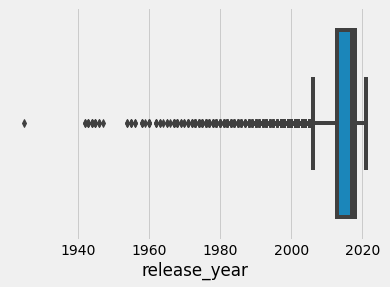

In [17]:
import seaborn as sns
sns.boxplot(x=dataset['release_year'])

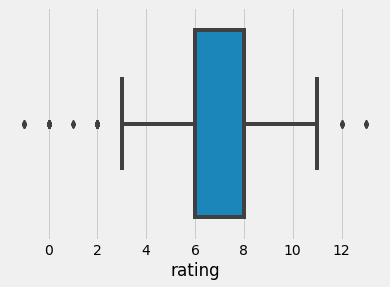

In [18]:
import seaborn as sns
sns.boxplot(x=dataset['rating'])

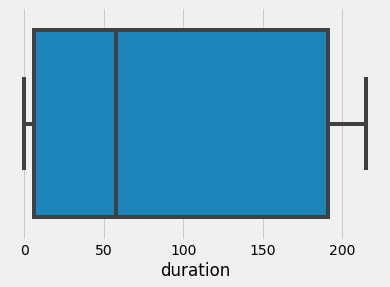

In [19]:
import seaborn as sns
sns.boxplot(x=dataset['duration'])

In [20]:
from sklearn .preprocessing import Normalizer
dataset.describe()

show_id         type  ...    listed_in  description
count  7787.000000  7787.000000  ...  7787.000000  7787.000000
mean   3893.000000     0.309490  ...   262.218698  3882.941955
std    2248.057606     0.462313  ...   125.383214  2242.880348
min       0.000000     0.000000  ...     0.000000     0.000000
25%    1946.500000     0.000000  ...   188.000000  1941.500000
50%    3893.000000     0.000000  ...   274.000000  3882.000000
75%    5839.500000     1.000000  ...   359.000000  5825.500000
max    7786.000000     1.000000  ...   491.000000  7768.000000

[8 rows x 11 columns]

2. Proses Data Mining Exploration

Text(0.5, 1.0, 'General Statistics of Netflix Movies and TV Shows Dataset')

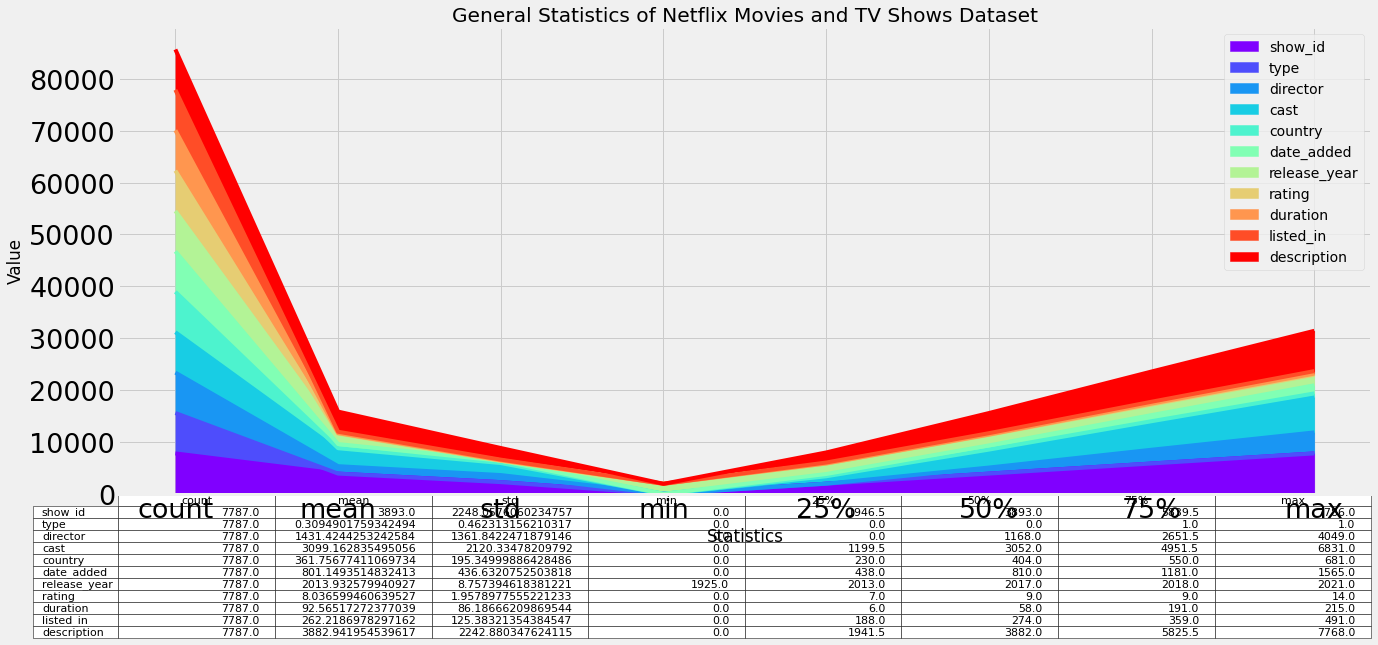

In [ ]:
#general statistic
dataset.describe().plot(kind="area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Netflix Movies and TV Shows Dataset")

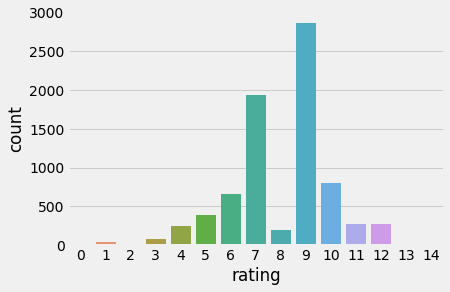

In [ ]:
#visualisasi data dengan countplot
sns.countplot('rating',data=dataset)
plt.show()

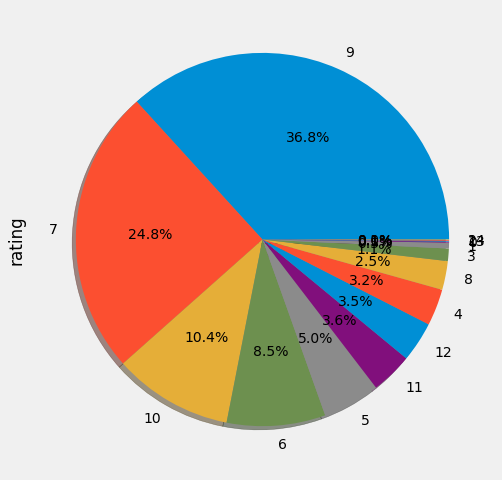

In [ ]:
dataset['rating'].value_counts().plot.pie(x=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

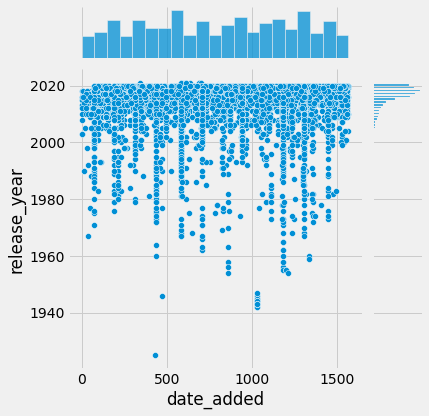

In [ ]:
#visualisasi data dengan jointplot
fig=sns.jointplot(x='date_added',y='release_year',data=dataset)

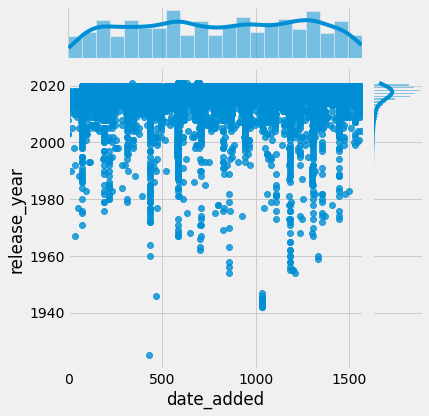

In [ ]:
sns.jointplot("date_added", "release_year", data=dataset, kind="reg")

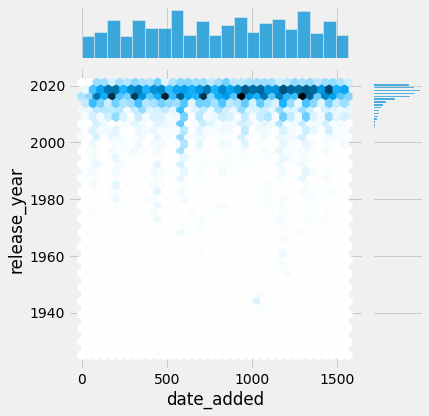

In [ ]:
fig=sns.jointplot(x='date_added',y='release_year',kind='hex',data=dataset)

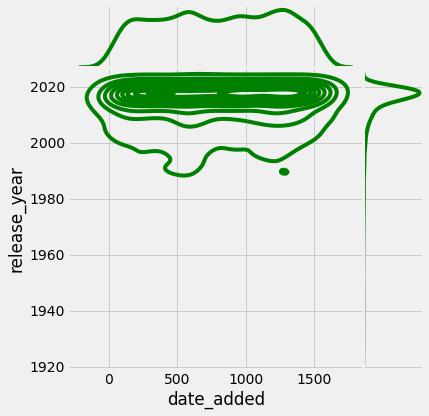

In [ ]:
sns.jointplot("date_added", "release_year", data=dataset, kind="kde",space=0,color='g')

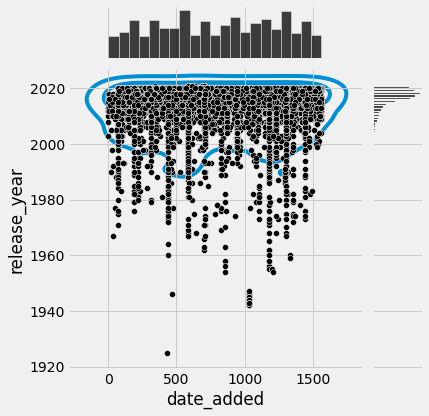

In [ ]:
g = (sns.jointplot("date_added", "release_year",data=dataset, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

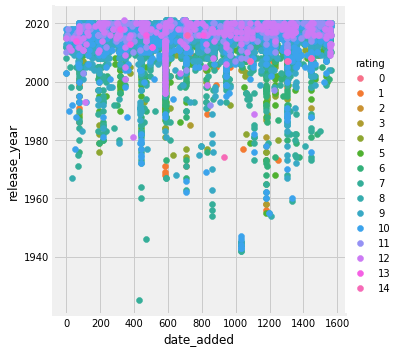

In [ ]:
#visualisasi data dengan facetgrid
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(dataset,hue='rating',size=5)\
.map(plt.scatter,'date_added','release_year')\
.add_legend()

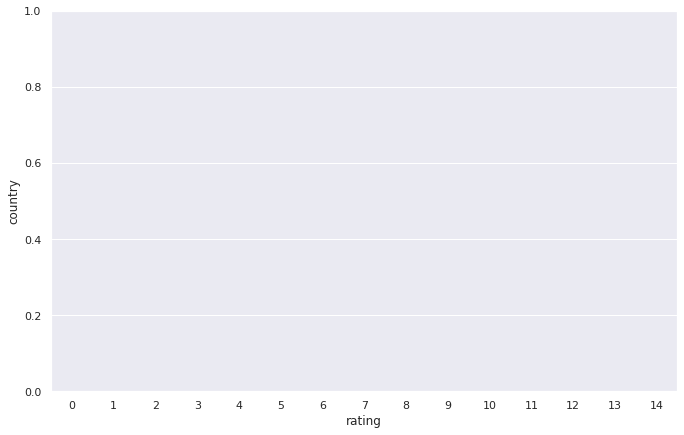

In [ ]:
#visualisasi data dengan boxplot
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='rating',y='country',data=dataset,order=['0','1','2','3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],linewidth=2.5,orient='v',dodge=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ae7582278>,
      dtype=object)

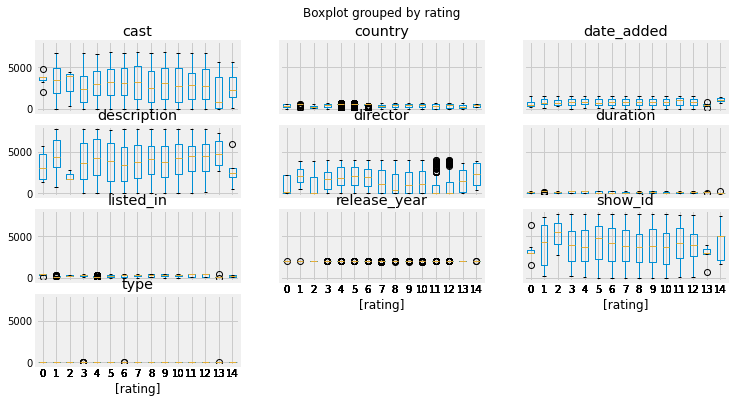

In [ ]:
dataset.boxplot(by="rating", figsize=(12, 6))

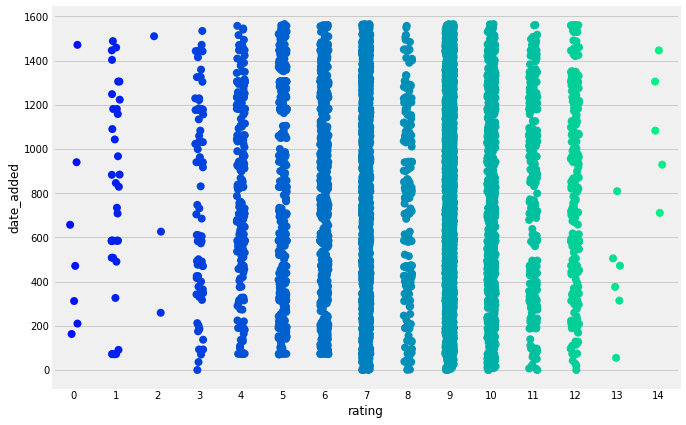

In [ ]:
#visualisasi data dengan stripplot
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='rating',y='date_added',data=dataset,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

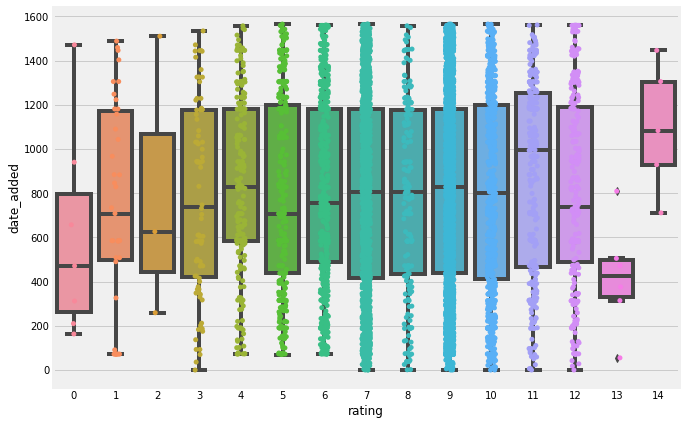

In [ ]:
#visualisasi data dengan Combination of boxplot and stripplot
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='rating',y='date_added',data=dataset)
fig=sns.stripplot(x='rating',y='date_added',data=dataset,jitter=True,edgecolor='gray')

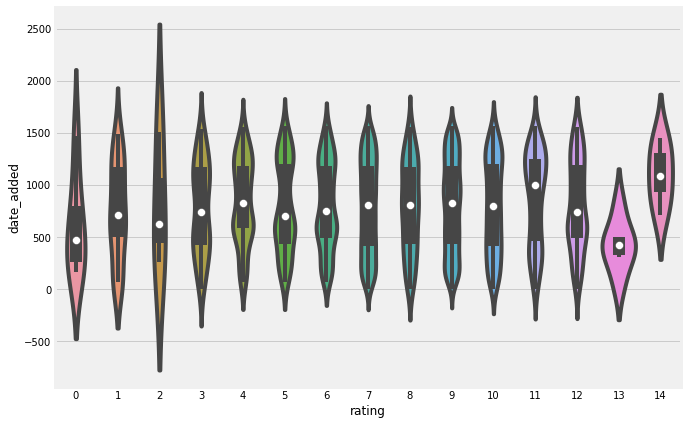

In [ ]:
#visualisasi data dengan violinplot
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='rating',y='date_added',data=dataset)

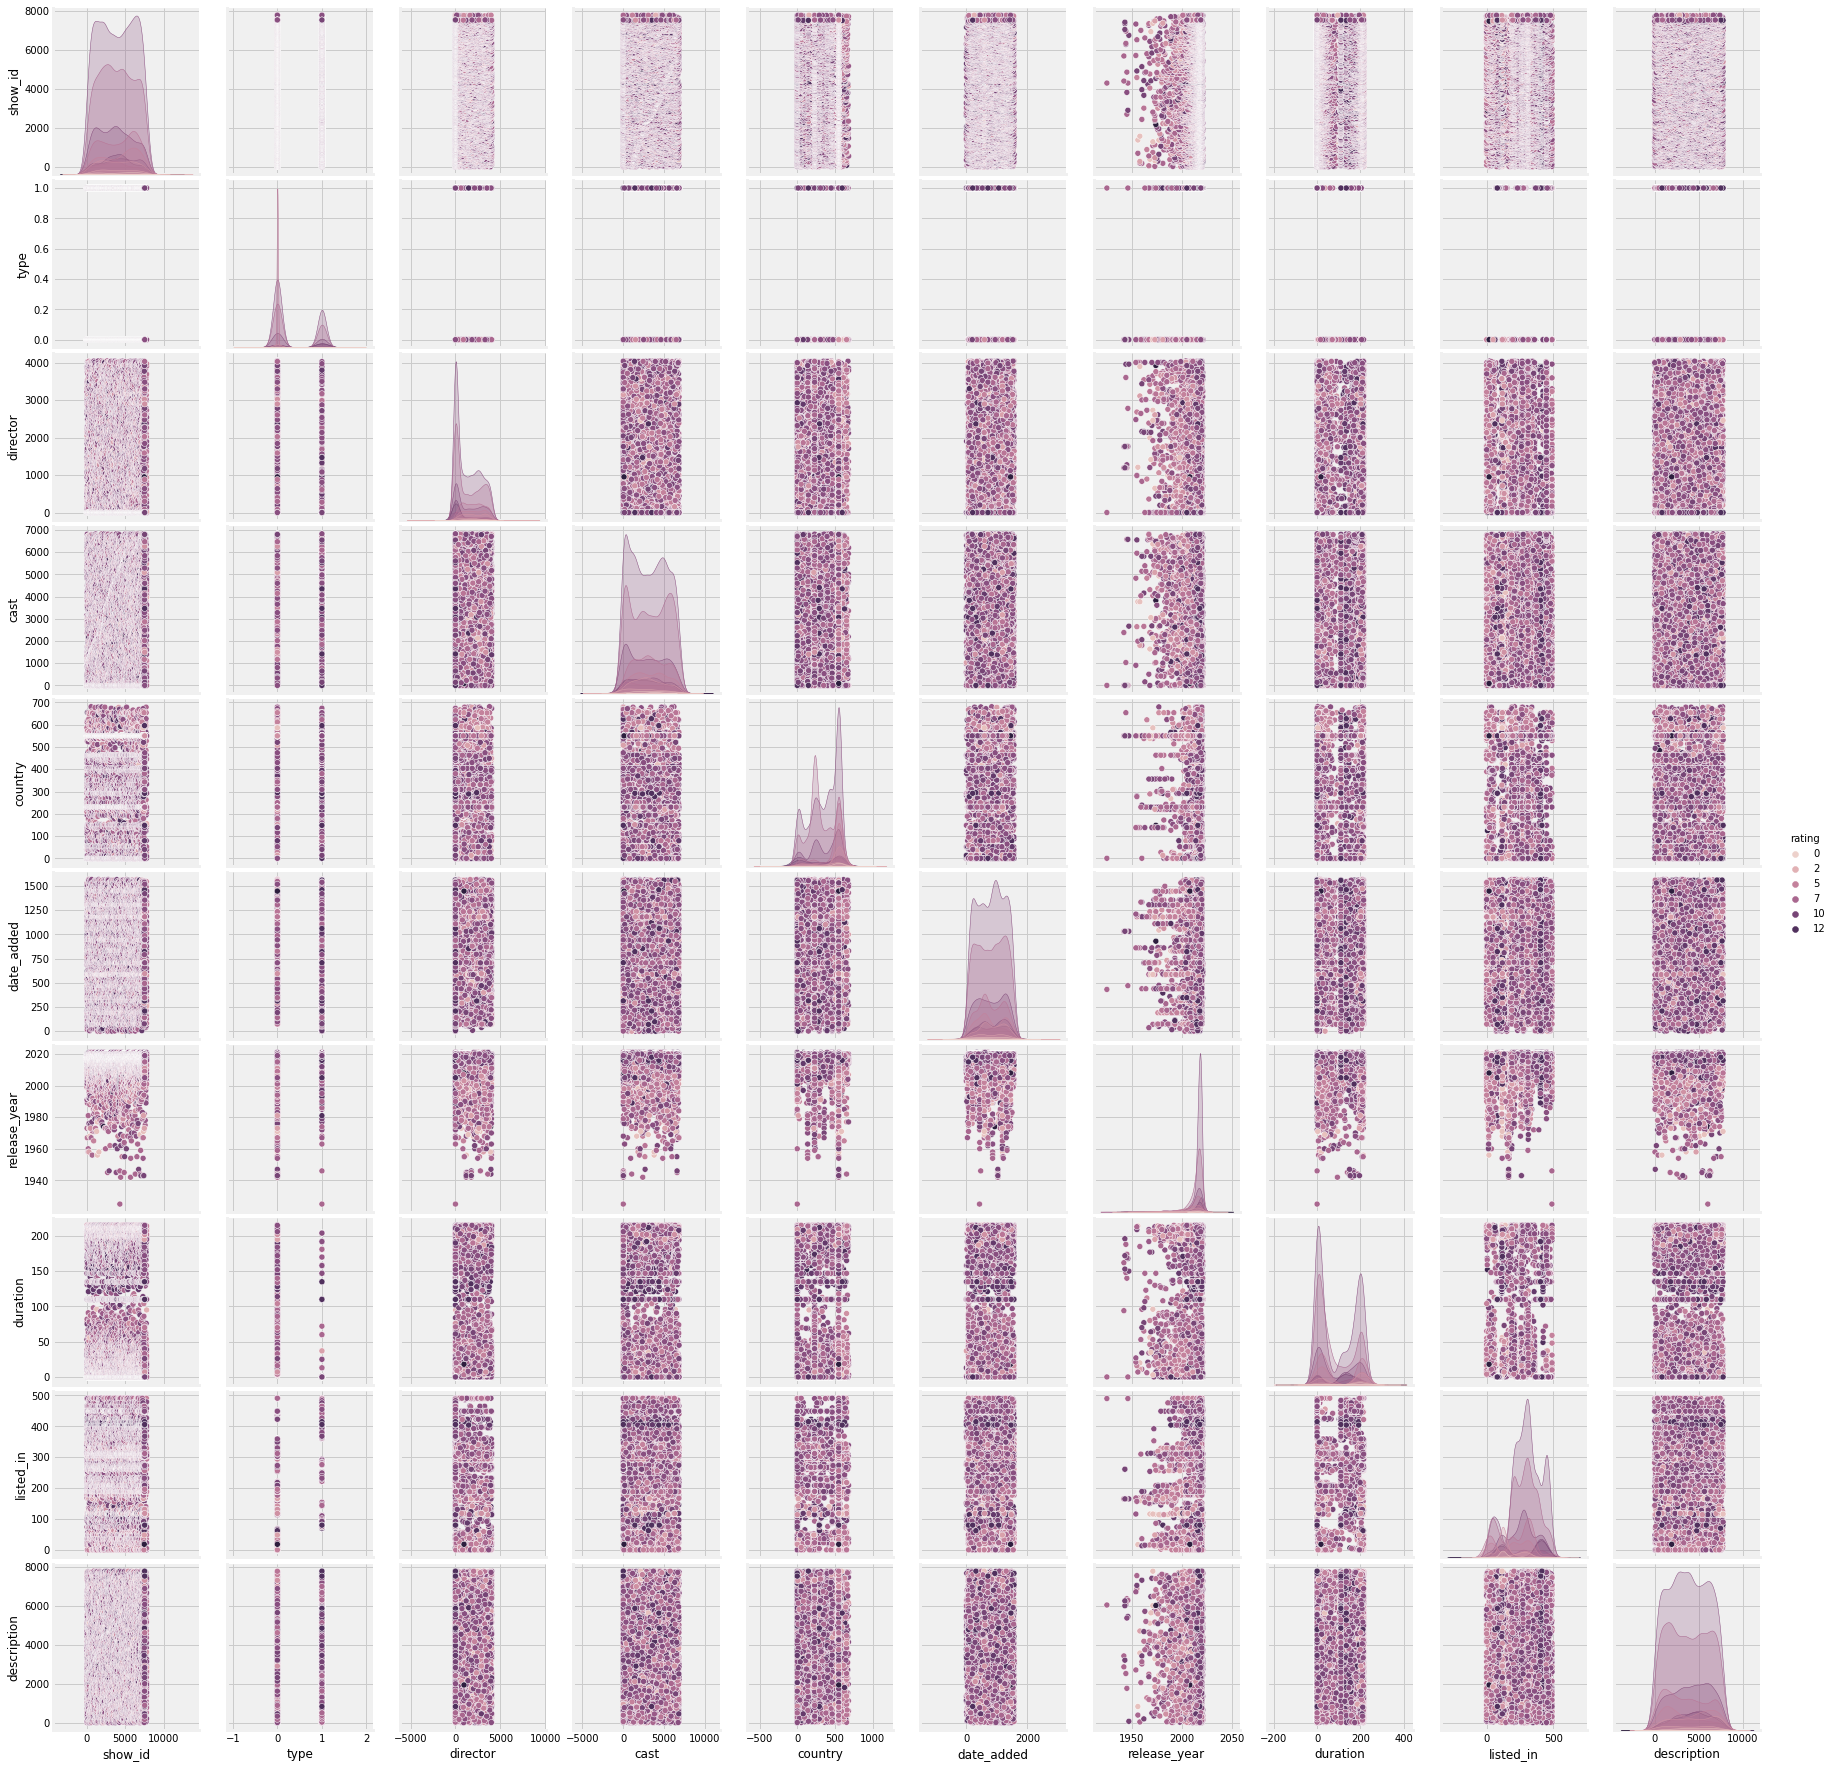

In [ ]:
#visualisasi data dengan pairplot
sns.pairplot(dataset,hue='rating')

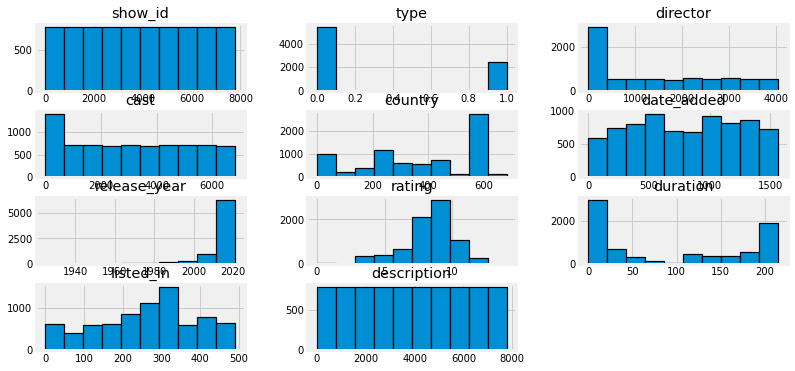

In [ ]:
#visualisasi data dengan histogram
dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

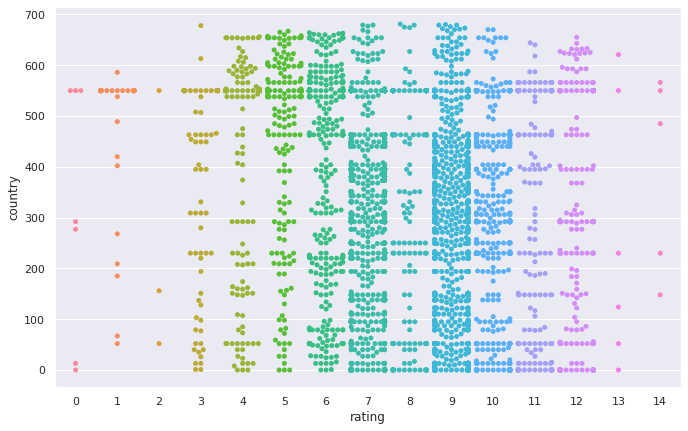

In [ ]:
#visualisasi data dengan swarmplot
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="rating", y="country", data=dataset)

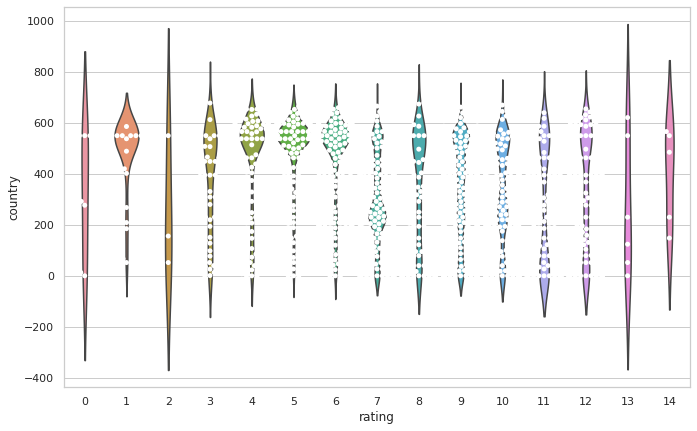

In [ ]:
#visualisasi data dengan violin + swarmplot
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="rating", y="country", data=dataset, inner=None)
ax = sns.swarmplot(x="rating", y="country", data=dataset,color="white", edgecolor="black")

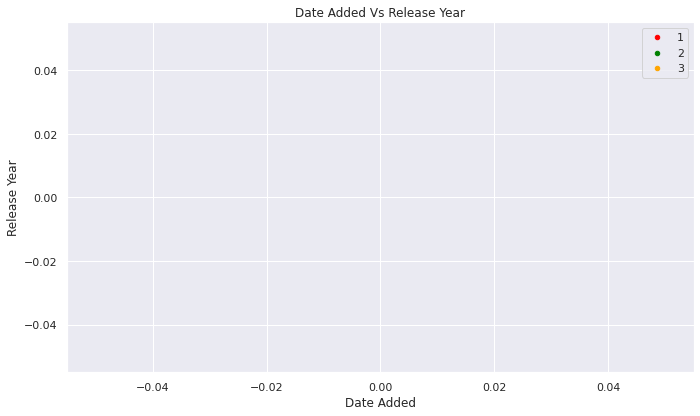

In [23]:
#visualisasi data dengan species based classification
sns.set(style="darkgrid")
sc=dataset[dataset.rating=='1'].plot(kind='scatter',x='date_added',y='release_year',color='red',label='1')
dataset[dataset.rating=='2'].plot(kind='scatter',x='date_added',y='release_year',color='green',label='2',ax=sc)
dataset[dataset.rating=='3'].plot(kind='scatter',x='date_added',y='release_year',color='orange', label='3', ax=sc)
sc.set_xlabel('Date Added')
sc.set_ylabel('Release Year')
sc.set_title('Date Added Vs Release Year')
sc=plt.gcf()
sc.set_size_inches(10,6)

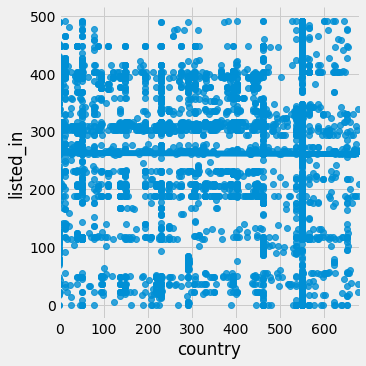

In [21]:
#visualisasi data dengan LM plot
fig=sns.lmplot(x="country", y="listed_in",data=dataset)

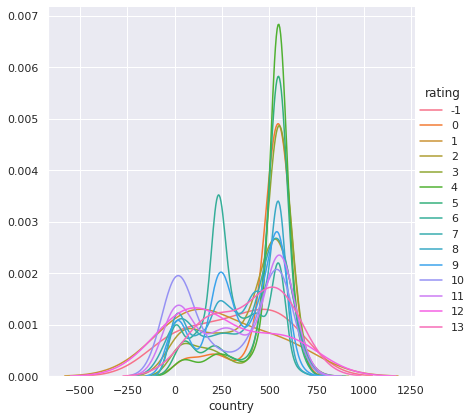

In [24]:
#visualisasi data dengan Facet Grid
sns.FacetGrid(dataset, hue="rating", size=6) \
   .map(sns.kdeplot, "country") \
   .add_legend()
plt.ioff() 

Kemungkinan penerapan pada data lain


> Penerapan proses data mining ini dapat diterapkan juga pada ketertarikan minat genre musik pada suatu daerah dengan begitu perusahaan produser musik dapat menentukan akan membuat lagu baru seperti apa yang dapat menarik minat masyarakat luas

